In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import glob
import os
import re
from shutil import copyfile
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
dall_scores = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('*_input_*/score.sc')], ignore_index = True)
print(dall_scores)

      SCORE:  total_score  angle_constraint  atom_pair_constraint  \
0     SCORE:     -915.158               0.0                   0.0   
1     SCORE:     -909.059               0.0                   0.0   
2     SCORE:     -910.411               0.0                   0.0   
3     SCORE:     -911.191               0.0                   0.0   
4     SCORE:     -916.803               0.0                   0.0   
5     SCORE:     -916.046               0.0                   0.0   
6     SCORE:     -912.052               0.0                   0.0   
7     SCORE:     -912.798               0.0                   0.0   
8     SCORE:     -907.499               0.0                   0.0   
9     SCORE:     -912.996               0.0                   0.0   
10    SCORE:     -937.229               0.0                   0.0   
11    SCORE:     -933.811               0.0                   0.0   
12    SCORE:     -935.391               0.0                   0.0   
13    SCORE:     -928.832         

In [3]:
dscore_per_design = pd.DataFrame()
dscore_per_design = dscore_per_design.append([pd.read_csv(f, sep='\s+', header=1).mean() for f in glob.glob('*_input_*/score.sc')], ignore_index = True)
print(dscore_per_design)


     total_score  angle_constraint  atom_pair_constraint  dihedral_constraint  \
0      -912.4013               0.0                   0.0               1.2600   
1      -935.6278               0.0                   0.0               1.0209   
2      -950.1586               0.0                   0.0               1.3007   
3      -929.4567               0.0                   0.0               1.4646   
4      -945.9132               0.0                   0.0               1.9863   
5      -919.7582               0.0                   0.0               0.8177   
6      -929.3319               0.0                   0.0               1.2193   
7      -942.6873               0.0                   0.0               0.5652   
8      -912.7075               0.0                   0.0               2.7472   
9      -920.7755               0.0                   0.0               3.8983   
10     -937.3739               0.0                   0.0               2.1005   
11     -941.6942            

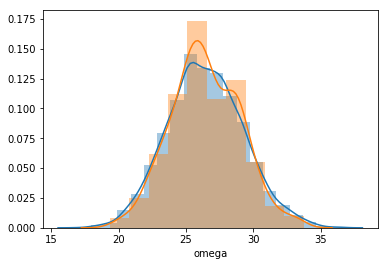

In [4]:
sns.distplot(dall_scores["omega"], bins=20)
sns.distplot(dscore_per_design["omega"], bins=10)

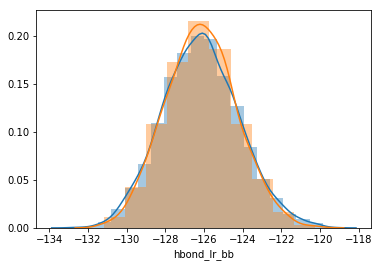

In [5]:
sns.distplot(dall_scores["hbond_lr_bb"], bins=20)
sns.distplot(dscore_per_design["hbond_lr_bb"], bins=10)

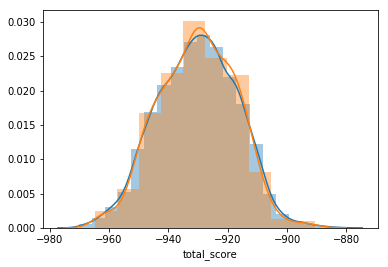

In [6]:
sns.distplot(dall_scores["total_score"], bins=20)
sns.distplot(dscore_per_design["total_score"], bins=10)

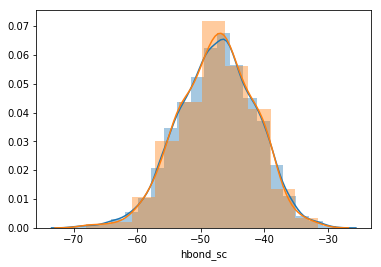

In [7]:
sns.distplot(dall_scores["hbond_sc"], bins=20)
sns.distplot(dscore_per_design["hbond_sc"], bins=10)

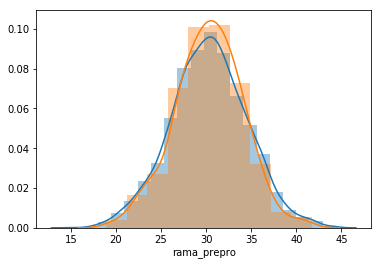

In [8]:
sns.distplot(dall_scores["rama_prepro"], bins=20)
sns.distplot(dscore_per_design["rama_prepro"], bins=10)

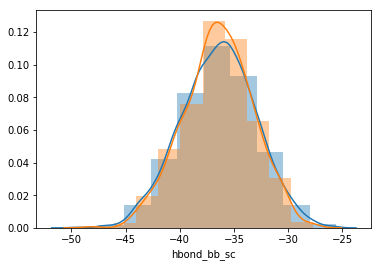

In [9]:
sns.distplot(dall_scores["hbond_bb_sc"], bins=10)
sns.distplot(dscore_per_design["hbond_bb_sc"], bins=10)

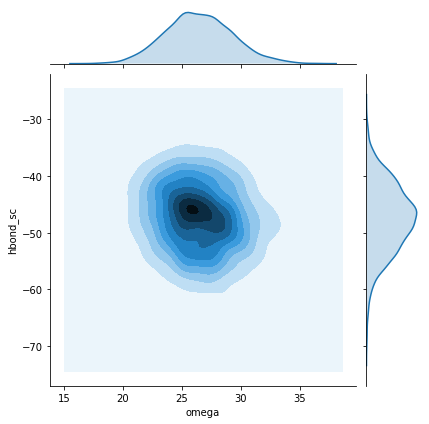

In [10]:
sns.jointplot("omega", "hbond_sc", dall_scores, kind='kde')

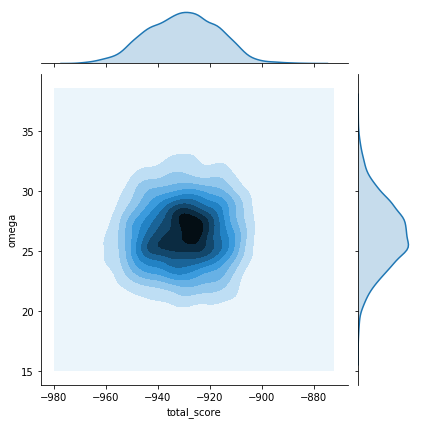

In [11]:
sns.jointplot("total_score", "omega", dall_scores, kind='kde')

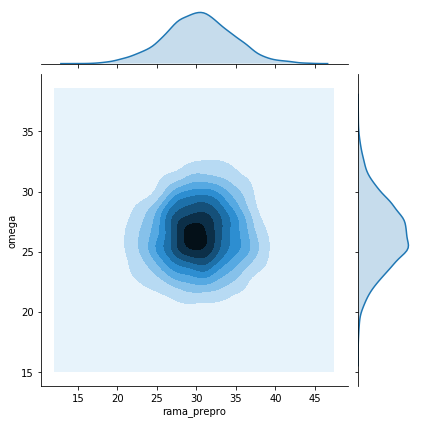

In [12]:
sns.jointplot("rama_prepro", "omega", dall_scores, kind='kde')

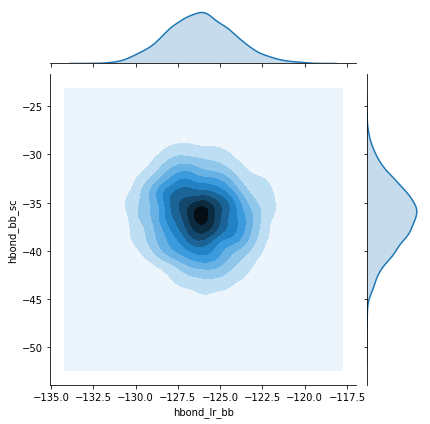

In [13]:
sns.jointplot("hbond_lr_bb", "hbond_bb_sc", dall_scores, kind='kde')

In [14]:
dall_scores["design"] = dall_scores.description.apply(lambda x: "_".join(x.split("_")[:-1]))
dall_scores.groupby(['design'], sort=False)['total_score'].max()

design
102_input_0023_0004_23_0001_0002_0001_0004   -907.499
0_input_0093_0003_8_0007_0001_0005_0008      -928.832
109_input_0045_0002_9_0004_0002_0001_0005    -945.101
10_input_0051_0002_13_0004_0005_0009_0009    -922.830
0_input_0093_0003_10_0001_0004_0007_0009     -941.975
16_input_0021_0001_14_0003_0010_0008_0002    -912.009
109_input_0090_0005_7_0001_0003_0007_0008    -925.084
11_input_0029_0002_6_0007_0008_0004_0007     -933.713
0_input_0093_0003_16_0005_0009_0007_0004     -903.280
10_input_0051_0002_17_0007_0009_0001_0010    -911.522
109_input_0045_0001_11_0009_0001_0003_0003   -925.447
0_input_0093_0003_9_0005_0002_0008_0004      -938.571
10_input_0051_0002_17_0005_0009_0001_0008    -919.010
25_input_0002_0001_15_0001_0002_0009         -937.713
10_input_0051_0002_11_0005_0003_0005_0002    -928.488
0_input_0093_0005_11_0004_0002_0006_0006     -911.182
106_input_0024_0003_6_0007_0002_0007_0003    -912.439
10_input_0051_0002_9_0007_0003_0002_0010     -912.520
10_input_0051_0002_11

In [15]:
idx = dall_scores.groupby(['design'])['total_score'].transform(max) == dall_scores['total_score']

dpicked = dall_scores[idx]
print(dpicked)

      SCORE:  total_score  angle_constraint  atom_pair_constraint  \
8     SCORE:     -907.499               0.0                   0.0   
13    SCORE:     -928.832               0.0                   0.0   
21    SCORE:     -945.101               0.0                   0.0   
36    SCORE:     -922.830               0.0                   0.0   
42    SCORE:     -941.975               0.0                   0.0   
53    SCORE:     -912.009               0.0                   0.0   
60    SCORE:     -925.084               0.0                   0.0   
75    SCORE:     -933.713               0.0                   0.0   
81    SCORE:     -903.280               0.0                   0.0   
93    SCORE:     -911.522               0.0                   0.0   
103   SCORE:     -925.447               0.0                   0.0   
115   SCORE:     -938.571               0.0                   0.0   
123   SCORE:     -919.010               0.0                   0.0   
131   SCORE:     -937.713         

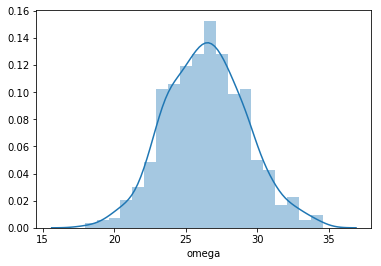

In [16]:
sns.distplot(dpicked["omega"], bins=20)

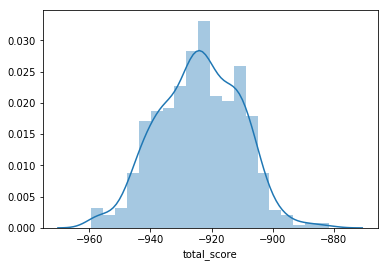

In [17]:
sns.distplot(dpicked["total_score"], bins=20)

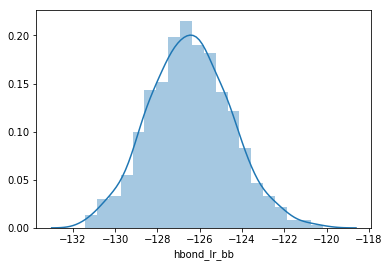

In [18]:
sns.distplot(dpicked["hbond_lr_bb"], bins=20)

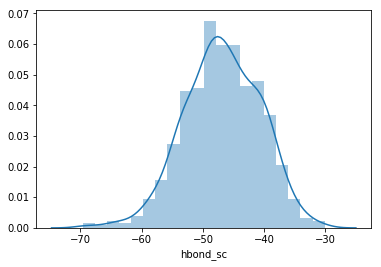

In [19]:
sns.distplot(dpicked["hbond_sc"], bins=20)

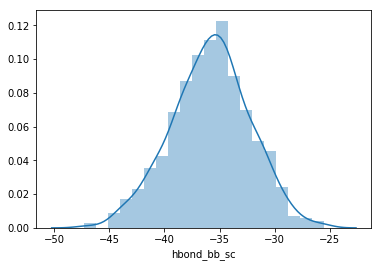

In [20]:
sns.distplot(dpicked["hbond_bb_sc"], bins=20)

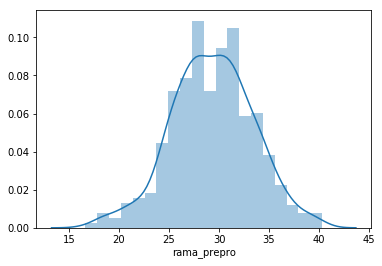

In [21]:
sns.distplot(dpicked["rama_prepro"], bins=20)

In [24]:
dpicked_2 = dpicked.loc[dpicked["omega"] < 26.5]
dpicked_2

,SCORE:,total_score,angle_constraint,atom_pair_constraint,dihedral_constraint,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,...,hbond_sr_bb,lk_ball_wtd,omega,p_aa_pp,pro_close,rama_prepro,ref,yhh_planarity,description,design
8,SCORE:,-907.499,0.0,0.0,1.366,0.0,-948.065,198.145,-398.151,1.806,...,-30.709,1.124,22.432,-41.433,2.556,31.848,-69.301,1.095,102_input_0023_0004_23_0001_0002_0001_0004_0009,102_input_0023_0004_23_0001_0002_0001_0004
21,SCORE:,-945.101,0.0,0.0,1.376,0.0,-950.738,205.346,-426.422,1.778,...,-34.730,7.422,19.570,-46.001,1.452,30.741,-87.473,0.603,109_input_0045_0002_9_0004_0002_0001_0005_0002,109_input_0045_0002_9_0004_0002_0001_0005
42,SCORE:,-941.975,0.0,0.0,1.932,0.0,-1005.598,208.758,-403.198,1.925,...,-30.325,5.370,23.463,-49.464,1.409,31.834,-57.941,0.876,0_input_0093_0003_10_0001_0004_0007_0009_0003,0_input_0093_0003_10_0001_0004_0007_0009
53,SCORE:,-912.009,0.0,0.0,1.042,0.0,-971.940,204.741,-408.689,1.970,...,-29.432,7.441,22.826,-47.439,1.697,18.734,-34.233,0.890,16_input_0021_0001_14_0003_0010_0008_0002_0004,16_input_0021_0001_14_0003_0010_0008_0002
75,SCORE:,-933.713,0.0,0.0,0.523,0.0,-946.282,196.376,-416.578,1.785,...,-33.011,6.307,23.618,-39.268,2.124,33.059,-86.375,0.137,11_input_0029_0002_6_0007_0008_0004_0007_0006,11_input_0029_0002_6_0007_0008_0004_0007
103,SCORE:,-925.447,0.0,0.0,2.064,0.0,-935.860,194.380,-418.772,1.759,...,-31.920,10.549,24.965,-44.597,2.329,28.248,-78.002,0.271,109_input_0045_0001_11_0009_0001_0003_0003_0004,109_input_0045_0001_11_0009_0001_0003_0003
115,SCORE:,-938.571,0.0,0.0,1.609,0.0,-976.899,215.129,-422.268,1.844,...,-35.789,4.963,23.498,-46.411,1.794,35.638,-82.864,0.573,0_input_0093_0003_9_0005_0002_0008_0004_0006,0_input_0093_0003_9_0005_0002_0008_0004
131,SCORE:,-937.713,0.0,0.0,1.636,0.0,-938.374,199.310,-415.347,1.778,...,-32.117,4.155,25.930,-53.023,1.637,28.370,-92.158,0.681,25_input_0002_0001_15_0001_0002_0009_0002,25_input_0002_0001_15_0001_0002_0009
199,SCORE:,-906.993,0.0,0.0,2.819,0.0,-943.978,194.752,-425.761,1.874,...,-32.801,6.309,26.271,-45.308,1.726,30.018,-56.248,0.270,0_input_0093_0003_19_0002_0003_0008_0002_0010,0_input_0093_0003_19_0002_0003_0008_0002
209,SCORE:,-909.588,0.0,0.0,1.089,0.0,-927.375,187.346,-385.082,1.661,...,-25.767,4.404,19.587,-38.647,1.893,37.203,-86.605,0.308,102_input_0023_0004_23_0001_0002_0007_0003_0010,102_input_0023_0004_23_0001_0002_0007_0003


In [25]:
from shutil import copyfile

for index,row in dpicked_2.iterrows():
    pdb = row["description"] + ".pdb"
    source = row["design"] + "/" + pdb
    target = "../picked_B/" + pdb
    copyfile(source, target)